### Downloading dataset

In [246]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("brycecf/give-me-some-credit-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/give-me-some-credit-dataset


### Importing libraries

In [184]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns

### Loading the dataframe

In [185]:
df = pd.read_csv("/kaggle/input/give-me-some-credit-dataset/cs-training.csv")
df.head(2)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0


### Exploratory Data Analysis (EDA)

In [186]:
df.shape

(150000, 12)

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [188]:
df = df.drop("Unnamed: 0", axis = 1) # The first feature is unknown so we have to drop it

In [189]:
df.head(2)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

### Checking duplicate data

In [191]:
duplicate_rows = df[df.duplicated()]
print("Duplicate row: ", duplicate_rows.shape)

Duplicate row:  (609, 11)


In [192]:
df.drop_duplicates(inplace = True) # Dropping all the duplicate data

### Again checking duplicate to make sure that all duplicate data has been removed

In [193]:
duplicate_rows = df[df.duplicated()]
print("Duplicate row: ", duplicate_rows.shape) # NOw it should not show any duplicate row

Duplicate row:  (0, 11)


### Checking and Handling missing values

In [194]:
df.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29221
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3828
dtype: int64

In [195]:
df.count()

SeriousDlqin2yrs                        149391
RevolvingUtilizationOfUnsecuredLines    149391
age                                     149391
NumberOfTime30-59DaysPastDueNotWorse    149391
DebtRatio                               149391
MonthlyIncome                           120170
NumberOfOpenCreditLinesAndLoans         149391
NumberOfTimes90DaysLate                 149391
NumberRealEstateLoansOrLines            149391
NumberOfTime60-89DaysPastDueNotWorse    149391
NumberOfDependents                      145563
dtype: int64

### Visualizing the missing data

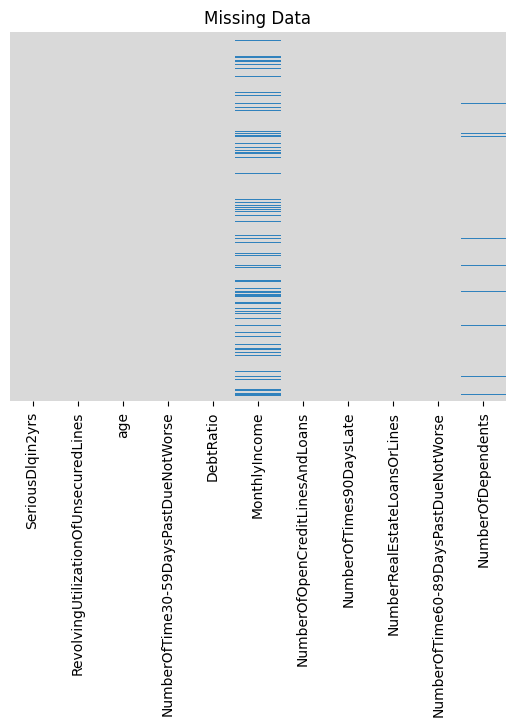

In [196]:
# Heatmap
sns.heatmap(df.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data')
plt.show()

### As from the above heatmap, the missing values of the feature "MonthlyIncome" are too high, we can remove it for the simplicity, but due to the required problem statement, this feature has a strong impact on the risk analysis, so here we will impute "Median" of the all "MonthlyIncome" values in the null spaces.

In [197]:
df["MonthlyIncome"].fillna(df["MonthlyIncome"].median(), inplace = True)

<ipython-input-197-f83cb06f5b64>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["MonthlyIncome"].fillna(df["MonthlyIncome"].median(), inplace = True)


### And same is the case for the other column "NumberOfDependents" with null values 

In [198]:
df["NumberOfDependents"].fillna(df["NumberOfDependents"].median(), inplace = True)

<ipython-input-198-5ae4bc77eb58>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["NumberOfDependents"].fillna(df["NumberOfDependents"].median(), inplace = True)


### Now again checking to make sure that all missing values have been handled

In [199]:
df.count()

SeriousDlqin2yrs                        149391
RevolvingUtilizationOfUnsecuredLines    149391
age                                     149391
NumberOfTime30-59DaysPastDueNotWorse    149391
DebtRatio                               149391
MonthlyIncome                           149391
NumberOfOpenCreditLinesAndLoans         149391
NumberOfTimes90DaysLate                 149391
NumberRealEstateLoansOrLines            149391
NumberOfTime60-89DaysPastDueNotWorse    149391
NumberOfDependents                      149391
dtype: int64

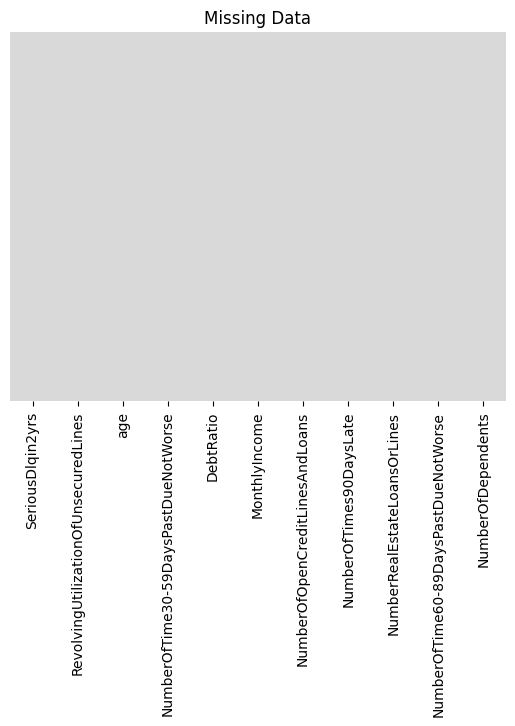

In [200]:
# Heatmap
sns.heatmap(df.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data')
plt.show()

### From the above heatmap, it is clear that, now no null value is present in the datframe

### Now Outliers Detection

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149391 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         149391 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    149391 non-null  float64
dtypes: fl

<Axes: xlabel='SeriousDlqin2yrs'>

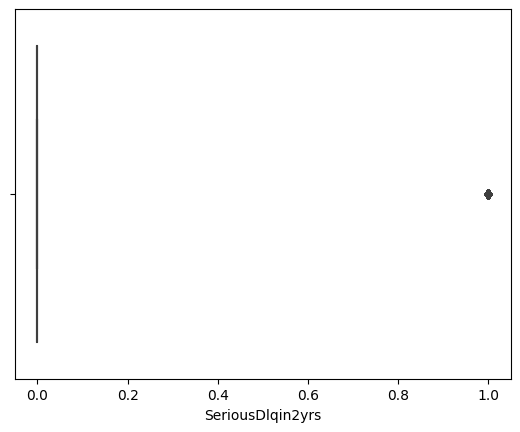

In [202]:
sns.boxplot(x=df["SeriousDlqin2yrs"])

<Axes: xlabel='RevolvingUtilizationOfUnsecuredLines'>

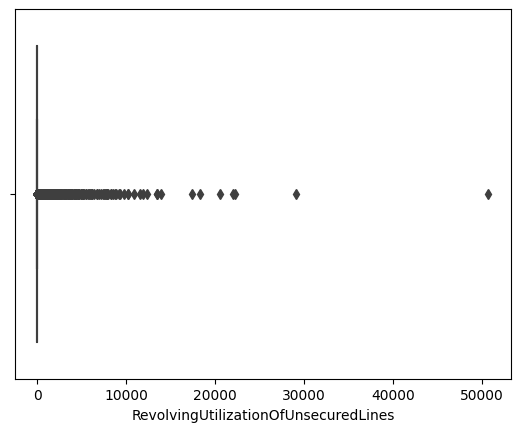

In [203]:
sns.boxplot(x=df["RevolvingUtilizationOfUnsecuredLines"])

<Axes: xlabel='age'>

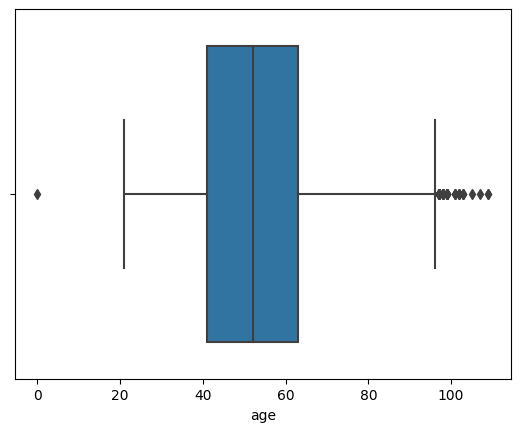

In [204]:
sns.boxplot(x=df["age"])

<Axes: xlabel='NumberOfTime30-59DaysPastDueNotWorse'>

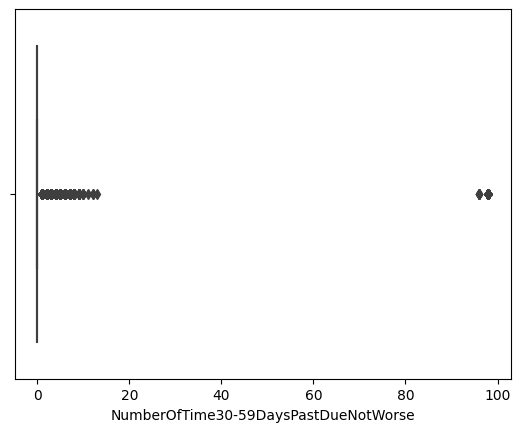

In [205]:
sns.boxplot(x=df["NumberOfTime30-59DaysPastDueNotWorse"])

<Axes: xlabel='DebtRatio'>

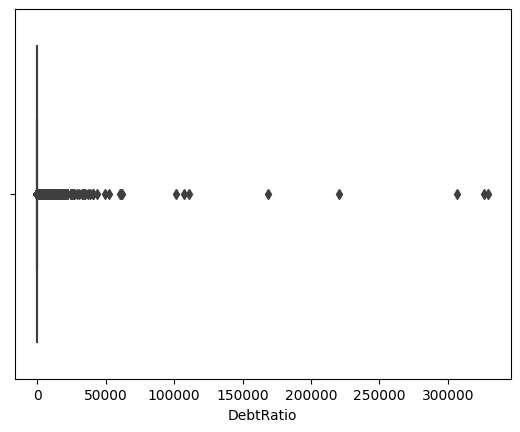

In [206]:
sns.boxplot(x=df["DebtRatio"])

<Axes: xlabel='MonthlyIncome'>

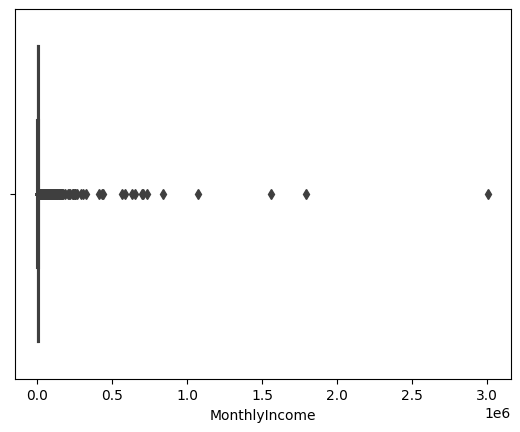

In [207]:
sns.boxplot(x=df["MonthlyIncome"])

<Axes: xlabel='NumberOfOpenCreditLinesAndLoans'>

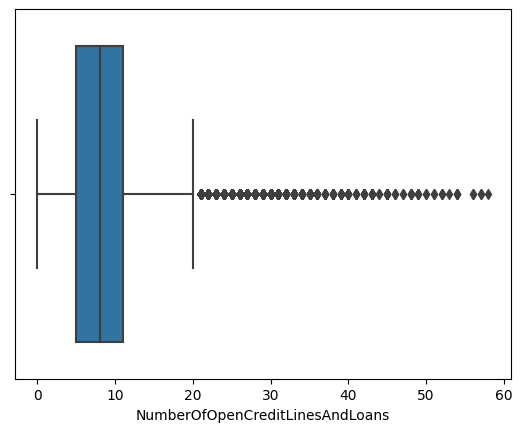

In [208]:
sns.boxplot(x=df["NumberOfOpenCreditLinesAndLoans"])

<Axes: xlabel='NumberOfTimes90DaysLate'>

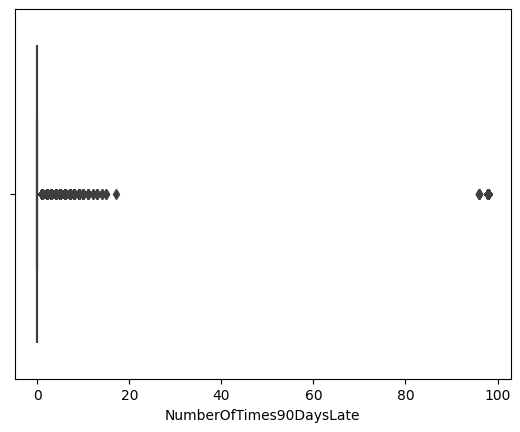

In [209]:
sns.boxplot(x=df["NumberOfTimes90DaysLate"])

<Axes: xlabel='NumberRealEstateLoansOrLines'>

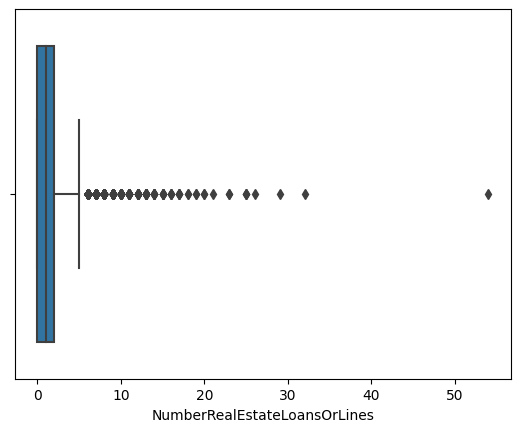

In [210]:
sns.boxplot(x=df["NumberRealEstateLoansOrLines"])

<Axes: xlabel='NumberOfTime60-89DaysPastDueNotWorse'>

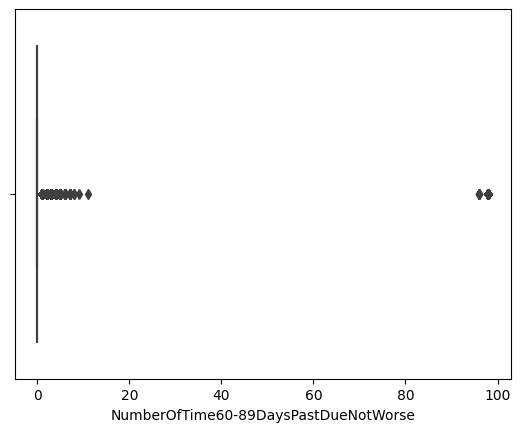

In [211]:
sns.boxplot(x=df["NumberOfTime60-89DaysPastDueNotWorse"])

<Axes: xlabel='NumberOfDependents'>

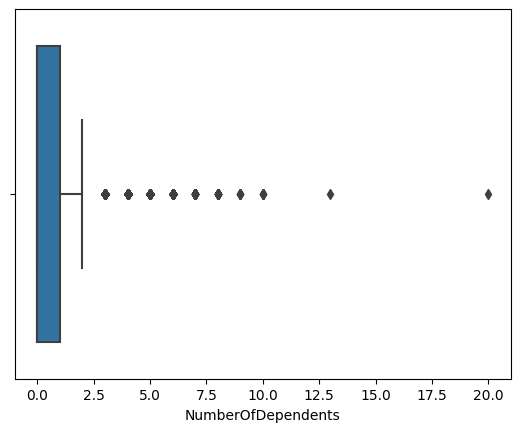

In [212]:
sns.boxplot(x=df["NumberOfDependents"])

### Handling the detected outliers

In [213]:
# This list of features have outliers, so we have to handle them
features = ["SeriousDlqin2yrs", "RevolvingUtilizationOfUnsecuredLines", "age", "NumberOfTime30-59DaysPastDueNotWorse", "DebtRatio", "MonthlyIncome", "NumberOfOpenCreditLinesAndLoans", "NumberOfTimes90DaysLate", "NumberRealEstateLoansOrLines", "NumberOfTime60-89DaysPastDueNotWorse", "NumberOfDependents"]
for feature in features:
    Q1 = df[feature].quantile(0.25) # First 25% data of the whole dataframe
    Q3 = df[feature].quantile(0.75) # Data between 50% and 75% of the whole dataframe
    IQR = Q3 - Q1 # Interquartile Range

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[feature] = df[feature].clip(lower_bound, upper_bound) # Outliers handled

### Now again some random check up to make sure that outliers have been removed successfully

<Axes: xlabel='NumberRealEstateLoansOrLines'>

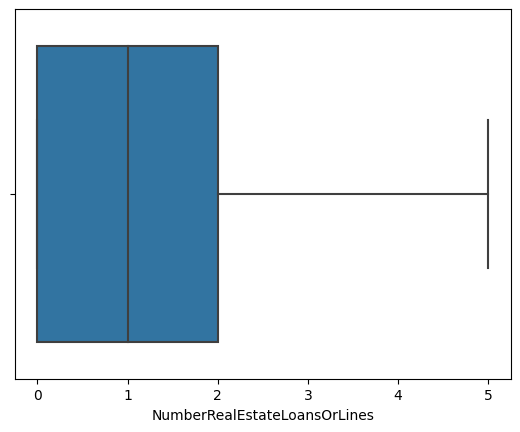

In [214]:
sns.boxplot(x=df["NumberRealEstateLoansOrLines"])

<Axes: xlabel='NumberOfDependents'>

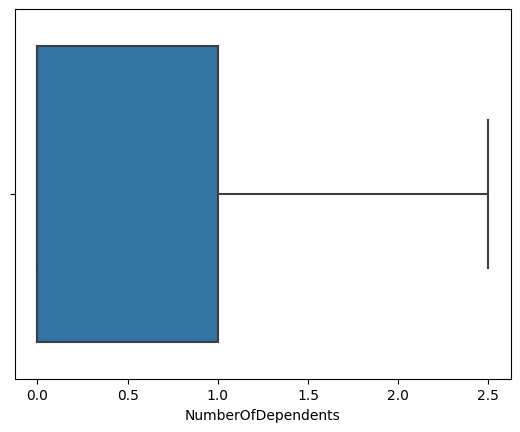

In [215]:
sns.boxplot(x=df["NumberOfDependents"])

<Axes: xlabel='NumberOfOpenCreditLinesAndLoans'>

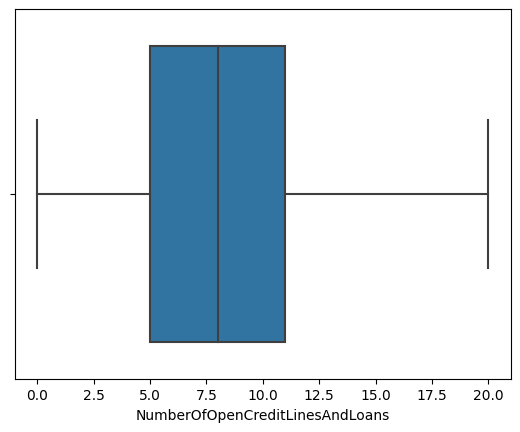

In [216]:
sns.boxplot(x=df["NumberOfOpenCreditLinesAndLoans"])

### From the above check up, it is understood that outliers have been removed from the whole data

### Now checking Correlation between different features

In [217]:
df.corr()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
SeriousDlqin2yrs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RevolvingUtilizationOfUnsecuredLines,NaN,1.000000,-0.276666,NaN,-0.017393,-0.094713,-0.167998,NaN,-0.075638,NaN,0.094749
age,NaN,-0.276666,1.000000,NaN,0.084616,0.094520,0.149846,NaN,0.034768,NaN,-0.228210
NumberOfTime30-59DaysPastDueNotWorse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DebtRatio,NaN,-0.017393,0.084616,NaN,1.000000,-0.204745,0.031386,NaN,0.134799,NaN,-0.159573
MonthlyIncome,NaN,-0.094713,0.094520,NaN,-0.204745,1.000000,0.272132,NaN,0.352973,NaN,0.196173
NumberOfOpenCreditLinesAndLoans,NaN,-0.167998,0.149846,NaN,0.031386,0.272132,1.000000,NaN,0.449159,NaN,0.086581
NumberOfTimes90DaysLate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberRealEstateLoansOrLines,NaN,-0.075638,0.034768,NaN,0.134799,0.352973,0.449159,NaN,1.000000,NaN,0.149791
NumberOfTime60-89DaysPastDueNotWorse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### As in correlation there are NaN values of some features so we have to handle them

In [218]:
df.nunique()

SeriousDlqin2yrs                             1
RevolvingUtilizationOfUnsecuredLines    124985
age                                         77
NumberOfTime30-59DaysPastDueNotWorse         1
DebtRatio                               106830
MonthlyIncome                            10756
NumberOfOpenCreditLinesAndLoans             21
NumberOfTimes90DaysLate                      1
NumberRealEstateLoansOrLines                 6
NumberOfTime60-89DaysPastDueNotWorse         1
NumberOfDependents                           4
dtype: int64

### The following features have constant values due to zero variance, so we have to remove them

In [219]:
df = df.drop(['NumberOfTime30-59DaysPastDueNotWorse', 
              'NumberOfTimes90DaysLate', 
              'NumberOfTime60-89DaysPastDueNotWorse'], axis=1)

In [220]:
df.corr()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents
SeriousDlqin2yrs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RevolvingUtilizationOfUnsecuredLines,NaN,1.000000,-0.276666,-0.017393,-0.094713,-0.167998,-0.075638,0.094749
age,NaN,-0.276666,1.000000,0.084616,0.094520,0.149846,0.034768,-0.228210
DebtRatio,NaN,-0.017393,0.084616,1.000000,-0.204745,0.031386,0.134799,-0.159573
MonthlyIncome,NaN,-0.094713,0.094520,-0.204745,1.000000,0.272132,0.352973,0.196173
NumberOfOpenCreditLinesAndLoans,NaN,-0.167998,0.149846,0.031386,0.272132,1.000000,0.449159,0.086581
NumberRealEstateLoansOrLines,NaN,-0.075638,0.034768,0.134799,0.352973,0.449159,1.000000,0.149791
NumberOfDependents,NaN,0.094749,-0.228210,-0.159573,0.196173,0.086581,0.149791,1.000000


In [221]:
df['SeriousDlqin2yrs'].isnull().sum()

0

In [222]:
df['SeriousDlqin2yrs'].value_counts()

SeriousDlqin2yrs
0    149391
Name: count, dtype: int64

### Here the variabe "SeriousDlqin2yrs" have also a constant value, and this is our target variable but due to contstant value we can not consider it as a target variable, so we will simpply drop it and will create another target variable from the dataframe

In [223]:
df = df.drop(["SeriousDlqin2yrs"], axis=1)

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149391 entries, 0 to 149999
Data columns (total 7 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 1   age                                   149391 non-null  int64  
 2   DebtRatio                             149391 non-null  float64
 3   MonthlyIncome                         149391 non-null  float64
 4   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 5   NumberRealEstateLoansOrLines          149391 non-null  int64  
 6   NumberOfDependents                    149391 non-null  float64
dtypes: float64(4), int64(3)
memory usage: 9.1 MB


### Here we are creating a new variable "HighRisk" from the "DebtRatio" feature

In [225]:
df['HighRisk'] = (df['DebtRatio'] > df['DebtRatio'].median()).astype(int)  # 1 = High Risk, 0 = Low Risk

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149391 entries, 0 to 149999
Data columns (total 8 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 1   age                                   149391 non-null  int64  
 2   DebtRatio                             149391 non-null  float64
 3   MonthlyIncome                         149391 non-null  float64
 4   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 5   NumberRealEstateLoansOrLines          149391 non-null  int64  
 6   NumberOfDependents                    149391 non-null  float64
 7   HighRisk                              149391 non-null  int64  
dtypes: float64(4), int64(4)
memory usage: 10.3 MB


In [227]:
df.corr()

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,HighRisk
RevolvingUtilizationOfUnsecuredLines,1.000000,-0.276666,-0.017393,-0.094713,-0.167998,-0.075638,0.094749,0.064452
age,-0.276666,1.000000,0.084616,0.094520,0.149846,0.034768,-0.228210,0.021270
DebtRatio,-0.017393,0.084616,1.000000,-0.204745,0.031386,0.134799,-0.159573,0.718016
MonthlyIncome,-0.094713,0.094520,-0.204745,1.000000,0.272132,0.352973,0.196173,-0.185595
NumberOfOpenCreditLinesAndLoans,-0.167998,0.149846,0.031386,0.272132,1.000000,0.449159,0.086581,0.182191
NumberRealEstateLoansOrLines,-0.075638,0.034768,0.134799,0.352973,0.449159,1.000000,0.149791,0.325173
NumberOfDependents,0.094749,-0.228210,-0.159573,0.196173,0.086581,0.149791,1.000000,-0.047710
HighRisk,0.064452,0.021270,0.718016,-0.185595,0.182191,0.325173,-0.047710,1.000000


<Axes: >

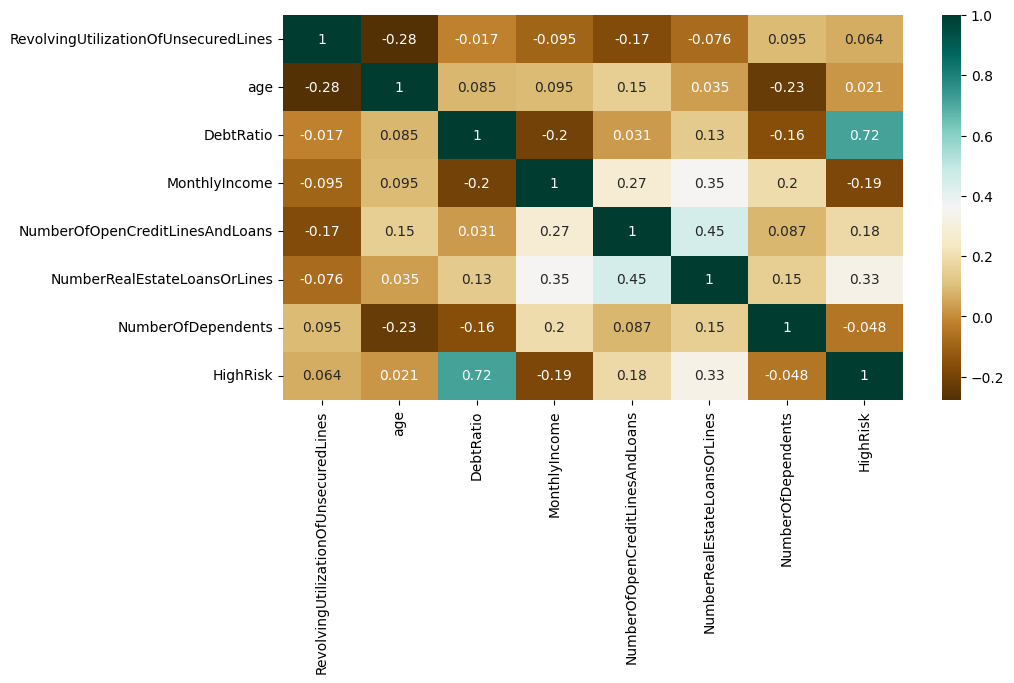

In [228]:
# Adjusting the Size of Figure
plt.figure(figsize=(10,5))
# calculating the Correlation
correlation = df.corr()
# Displaying the correlation using the Heap Map
sns.heatmap(correlation,cmap="BrBG",annot=True) # Br: Brown. B: Blue, G: Green

#correlation

### From the above Heatmap the feature "NumberOfDependents" has almost no correlation i.e (-0.048) with the the target i.e "HighRisk", So we will also remove it

In [229]:
df = df.drop(["NumberOfDependents"], axis=1)

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149391 entries, 0 to 149999
Data columns (total 7 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 1   age                                   149391 non-null  int64  
 2   DebtRatio                             149391 non-null  float64
 3   MonthlyIncome                         149391 non-null  float64
 4   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 5   NumberRealEstateLoansOrLines          149391 non-null  int64  
 6   HighRisk                              149391 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 9.1 MB


### Now seperating feature and Target variables

In [231]:
x = df.drop(columns = ["HighRisk"]) # Features
y = df["HighRisk"] # Target

In [232]:
print("Shape of Features: ",x.shape)
print("Shape of Terget: ",y.shape)

Shape of Features:  (149391, 6)
Shape of Terget:  (149391,)


### Now checking if the data is balanced or imbalanced

In [233]:
from collections import Counter
# Checking class distribution before
print("Distribution of Target Y is :", Counter(y))

Distribution of Target Y is : Counter({0: 74696, 1: 74695})


### So from the above reult it is clear that the dataset is balanced

### Now splitting the dataset into training and testing data

In [234]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 101)

In [236]:
x_train.shape
x_train

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines
72917,1.000000,28,0.000000,2600.0,2,0
141426,0.837581,56,0.057221,1100.0,2,0
76409,0.302999,68,0.292034,5560.0,11,0
117479,0.007109,59,1.922036,5400.0,8,2
72774,0.433496,38,0.191272,8500.0,6,1
...,...,...,...,...,...,...
87930,0.603049,54,0.315073,12650.0,7,2
149032,0.043342,47,0.302962,5300.0,11,1
55405,0.095077,29,0.669693,3193.0,7,1
49846,0.831413,62,0.921206,6700.0,12,2


In [237]:
y_train.shape
y_train

72917     0
141426    0
76409     0
117479    1
72774     0
         ..
87930     0
149032    0
55405     1
49846     1
137290    0
Name: HighRisk, Length: 119512, dtype: int64

### Feature Scaling
### Now we have to scale all the feature vaules bewtween 0 and 1

In [238]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

### Now finally Training the model

### Random Forest

In [239]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train_scaled, y_train)

RandomForestClassifier()

### Evaluating Random Forest

Random Forest
**********************************************
Accuracy:  76.36
Precision:  100.0
Recall:  52.71
F1 Score:  69.03
Confusion Matrix: 
  [[14944     0]
 [ 7063  7872]]


<Axes: >

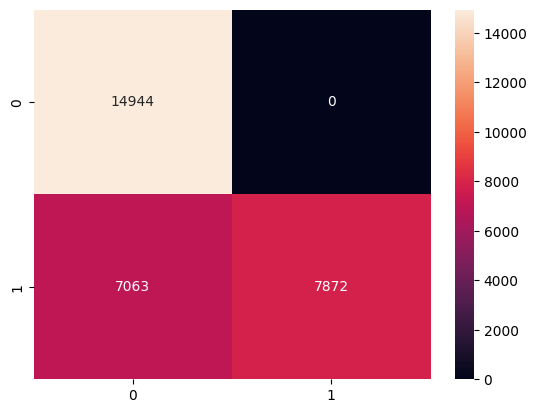

In [240]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

y_pred_rf = rf.predict(x_test_scaled) # prediction from the model

# scoring
print("Random Forest")
print("**********************************************")
rf_accuracy = round(accuracy_score(y_test, y_pred_rf) * 100, 2) # Accuracy
print("Accuracy: ", rf_accuracy)

rf_precision = round(precision_score(y_test, y_pred_rf) * 100, 2) # Precision
print("Precision: ", rf_precision)

rf_recall = round(recall_score(y_test, y_pred_rf) * 100, 2) # Recall
print("Recall: ", rf_recall)

rf_f1_score = round(f1_score(y_test, y_pred_rf) * 100, 2) # F1 score
print("F1 Score: ", rf_f1_score)

rf_confusion_matrix = confusion_matrix(y_test, y_pred_rf) # Confusion Matrix
print("Confusion Matrix: \n ", rf_confusion_matrix)

sns.heatmap(rf_confusion_matrix, annot=True, fmt='d')

### Gradient Boosting

In [241]:
from sklearn.ensemble import GradientBoostingClassifier

# Initializing the model
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, subsample=0.8)

# Training the model
gbc.fit(x_train_scaled, y_train)

GradientBoostingClassifier(subsample=0.8)

Gradient Boosting
**********************************************
Accuracy:  76.36
Precision:  100.0
Recall:  52.71
F1 Score:  69.03
Confusion Matrix: 
  [[14944     0]
 [ 7063  7872]]


<Axes: >

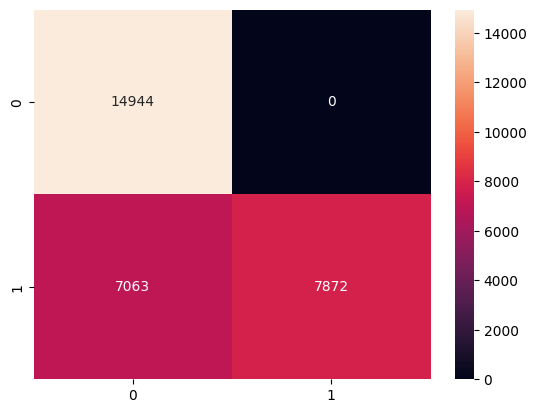

In [242]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

y_pred_gdc = rf.predict(x_test_scaled) # prediction from the model

# scoring
print("Gradient Boosting")
print("**********************************************")
gdc_accuracy = round(accuracy_score(y_test, y_pred_gdc) * 100, 2) # Accuracy
print("Accuracy: ", gdc_accuracy)

gdc_precision = round(precision_score(y_test, y_pred_gdc) * 100, 2) # Precision
print("Precision: ", gdc_precision)

gdc_recall = round(recall_score(y_test, y_pred_gdc) * 100, 2) # Recall
print("Recall: ", gdc_recall)

gdc_f1_score = round(f1_score(y_test, y_pred_gdc) * 100, 2) # F1 score
print("F1 Score: ", gdc_f1_score)

gdc_confusion_matrix = confusion_matrix(y_test, y_pred_gdc) # Confusion Matrix
print("Confusion Matrix: \n ", gdc_confusion_matrix)

sns.heatmap(gdc_confusion_matrix, annot=True, fmt='d')

### XGBoost

In [243]:
from xgboost import XGBClassifier

# Initialize the XGBoost model
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, use_label_encoder=False, eval_metric='logloss')

xgb.fit(x_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

XGBoost
**********************************************
Accuracy:  76.36
Precision:  100.0
Recall:  52.71
F1 Score:  69.03
Confusion Matrix: 
  [[14944     0]
 [ 7063  7872]]


<Axes: >

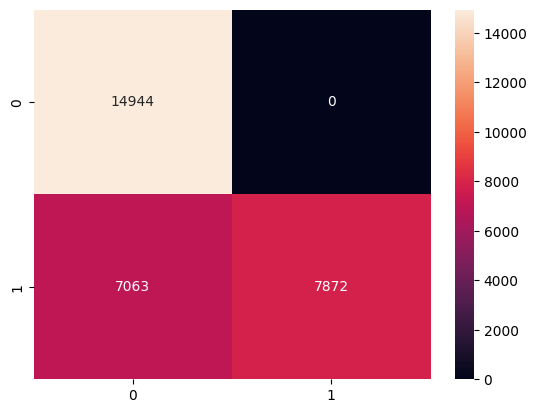

In [245]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

y_pred_xgb = rf.predict(x_test_scaled) # prediction from the model

# scoring
print("XGBoost")
print("**********************************************")
xgb_accuracy = round(accuracy_score(y_test, y_pred_xgb) * 100, 2) # Accuracy
print("Accuracy: ", xgb_accuracy)

xgb_precision = round(precision_score(y_test, y_pred_xgb) * 100, 2) # Precision
print("Precision: ", xgb_precision)

xgb_recall = round(recall_score(y_test, y_pred_xgb) * 100, 2) # Recall
print("Recall: ", xgb_recall)

xgb_f1_score = round(f1_score(y_test, y_pred_xgb) * 100, 2) # F1 score
print("F1 Score: ", xgb_f1_score)

xgb_confusion_matrix = confusion_matrix(y_test, y_pred_xgb) # Confusion Matrix
print("Confusion Matrix: \n ", xgb_confusion_matrix)

sns.heatmap(xgb_confusion_matrix, annot=True, fmt='d')